In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [ ]:
def findd(df):
    index = df.find(',')
    if index == -1:
        index = 0
    else:
        index = index+2
    return index

def finddd(df):
    index1 = df.find('+')
    index2 = df.find('-')
    return max(index1, index2)

def fin(df):
    index = df.find(':')
    return index

def period(x):
  if x<11:
    return 'start'
  elif x<21:
    return 'middle'
  else:
    return 'end'

def determining_week(x):
  index = x.find('/')
  hour = int(x[:index])
  weekday = int(x[index+1:])
  if hour >= 9 and hour < 17 and weekday != 0 and weekday != 6:
    return 'weekday'
  elif hour >= 9 and hour < 17 and (weekday == 0 or weekday == 6):
    return 'weekend'
  else:
    return 'all week'

def determining_day(x):
  index = x.find('/')
  hour = int(x[:index])
  weekday = int(x[index+1:])
  if hour >= 9 and hour < 17 and weekday != 0 and weekday != 6:
    return 'working hours'
  elif hour >= 9 and hour < 17 and (weekday == 0 or weekday == 6):
    return 'weekend day'
  elif hour >= 17 and hour <= 23:
    return 'evening'
  elif hour <= 5:
    return 'night'
  else:
    return 'morning'

def feature_engineering(train_df):

  train_df['date'] = train_df['date'].apply(lambda x: x.replace("  "," ")) #some rows have extra space

  train_df['day'] = train_df['date'].apply(lambda x: x[findd(x):findd(x)+2].replace(" ", ""))
  train_df['day'] = train_df['day'].apply(lambda x: '0'+x if len(x)==1 else x) # to be used for datetime

  train_df['month'] = train_df['date'].apply(lambda x: x[findd(x)+2:findd(x)+6].replace(" ", ""))

  train_df['year'] = train_df['date'].apply(lambda x: x[findd(x)+6:findd(x)+11].replace(" ", ""))

  train_df['hour'] = train_df['date'].apply(lambda x: x[findd(x)+11:fin(x)].replace(" ", ""))

  train_df['minute'] = train_df['date'].apply(lambda x: x[fin(x)+1:fin(x)+3].replace(" ", ""))

  train_df['second'] = train_df['date'].apply(lambda x: x[fin(x)+4:fin(x)+6].replace(" ", ""))

  train_df['GMT'] = train_df['date'].apply(lambda x: x[finddd(x):].replace(" ", ""))

  return train_df

def month_cleaner (x):
    try:
        x = datetime.strptime(x,'%b').strftime('%m')
        return(x)
    except:
        return (-1)
def week_day_cleaner (x):
    try:
        x = datetime.strptime(x, '%d-%b-%Y').strftime('%w')
        return(x)
    except:
        return (0)
    
def hour_cleaner (x):
    try:
        if x < 12:
            x = 'AM'  
        else: x = 'PM'
        return(x)
    except:
        return (0)
def day_of_week_cleaner(x):
    try:return(determining_week(x))
    except:return(0)
    
def time_of_day_cleaner(x):
    try:return(determining_day(x))
    except:return(0)

def feature_engineering_cleaning(train_df):
    # Feature Engineering after cleaning:
  # Example: maybe if promotion more images will be used than characters so proportion of char in body will be smaller

  train_df['month_number'] = train_df['month'].apply(month_cleaner)
  
  train_df['weekday'] = (train_df['day'] +'-'+ train_df['month'] +'-'+ train_df['year']).apply(week_day_cleaner)
  # Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.

  train_df['period_month'] = train_df['day'].astype(int).apply(lambda x: period(x))

  train_df['period_time'] = train_df['hour'].astype(int).apply(hour_cleaner)

  train_df['timezone'] = train_df['GMT'].apply(lambda x: x[:5]).apply(lambda x: '+0000' if len(x) != 5 else x).apply(lambda x: '+0000' if x == '-0000' else x)

  train_df['time'] = train_df['hour'].astype('str') +'/'+ train_df['weekday'].astype('str')

  train_df['day_of_week'] = train_df['time'].apply(day_of_week_cleaner)
  train_df['time_of_day'] = train_df['time'].apply(time_of_day_cleaner)

  train_df.drop('time',axis= 1, inplace=True)

  train_df['year'] = train_df['year'].astype(int)
  train_df['day'] = train_df['day'].astype(int)

  train_df = data_cleaner(train_df)

  train_df['chars_in_subject'] = train_df['chars_in_subject'].astype(int)
  train_df['chars_in_body'] = train_df['chars_in_body'].astype(int)
  train_df['hour'] = train_df['hour'].astype(int)
  train_df['month_number'] = train_df['month_number'].astype(int)
  train_df['weekday'] = train_df['weekday'].astype(int)


  train_df['chars_in_subject_proportion'] = train_df['chars_in_subject'] / (train_df['chars_in_subject'] + train_df['chars_in_body'])
  train_df['chars_in_body_proportion'] = train_df['chars_in_body'] / (train_df['chars_in_subject'] + train_df['chars_in_body'])

  train_df['urls_images_proportion'] = (train_df['urls'] + train_df['images'])/ (train_df['chars_in_body'] + train_df['urls'] + train_df['images'])

  train_df['urls_proportion_body'] = train_df['urls']/ (train_df['chars_in_body'] + 1)

  train_df['images_proportion_body'] = train_df['images']/ (train_df['chars_in_body'] + 1)

  train_df['chars_in_subject_proportion'] = train_df['chars_in_subject_proportion']

  train_df['chars_in_body_proportion'] = train_df['chars_in_body_proportion']

  train_df['urls_images_proportion'] = train_df['urls_images_proportion']

  train_df['urls_proportion_body'] = train_df['urls_proportion_body']

  train_df['images_proportion_body'] = train_df['images_proportion_body']

  return train_df

In [ ]:
hour_cleaner(10)

'AM'

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv') 

In [ ]:
def data_cleaner (df, chars_in_subject = train_df['chars_in_subject'].median() ):
    
    df['org'] = df['org'].fillna('org_undefinded')
    df['tld'] = df['tld'].fillna('tld_undefinded')
    df['mail_type'] = df['mail_type'].fillna('mail_type_undefinded').apply(lambda x:x.lower())
    df['chars_in_subject'] = df['chars_in_subject'].fillna(chars_in_subject)
    df.drop([ 'date', 'GMT', 'month', 'minute', 'second'],axis= 1, inplace=True)
    return (df)

def invert_str(x):
    return(x[::-1])

In [ ]:
# One hot encoding the mail_type


def ohe_mail_type (df):
    unique_mail_types = df['mail_type'].apply(lambda x: x.split('/')).explode().unique()
    for mt in unique_mail_types:
        df[f'mail_type_{mt}'] = df['mail_type'].apply(lambda x: 1 if mt in x else 0)
    df.drop('mail_type',axis =1,inplace = True)
    return(df)


def ohe_others(df):

  unique_period_month = df['period_month'].unique()
  for mt in unique_period_month:
      df[f'period_month_{mt}'] = df['period_month'].apply(lambda x: 1 if mt in x else 0)
  df.drop('period_month',axis= 1, inplace=True)

  unique_period_time = df['period_time'].unique()
  for mt in unique_period_time:
      df[f'period_time_{mt}'] = df['period_time'].apply(lambda x: 1 if mt in x else 0)
  df.drop('period_time',axis= 1, inplace=True)

  unique_day_of_week = df['day_of_week'].unique()
  for mt in unique_day_of_week:
      df[f'day_of_week_{mt}'] = df['day_of_week'].apply(lambda x: 1 if mt in x else 0)
  df.drop('day_of_week',axis= 1, inplace=True)

  unique_time_of_day = df['time_of_day'].unique()
  for mt in unique_time_of_day:
      df[f'time_of_day_{mt}'] = df['time_of_day'].apply(lambda x: 1 if mt in x else 0)
  df.drop('time_of_day',axis= 1, inplace=True)

  return df

In [ ]:
# Splitting tld
def tld_split(df):
    df['tld'].apply(lambda x:x.split('.')[0]).unique()
    df['tld_back'] = df['tld'].apply(lambda x: 'undefined_tld_back' if '.' not in x else invert_str(invert_str(x).split('.')[0].lower()))
    df['tld_front'] = df['tld'].apply(lambda x: 'undefined_tld_front' if '.' not in x else x.split('.')[0].lower())
    df.drop(['tld'], axis = 1, inplace = True)
    top_10_tld_back = pd.DataFrame(df[['tld_back']].groupby('tld_back').size()).sort_values(0,ascending=False).head(20).index.tolist()
    df['tld_back'] = df['tld_back'].apply(lambda x: x if x in top_10_tld_back else 'tld_back_Uncommon')
    for bk in df['tld_back'].unique().tolist():
        df[f'tld_back_{bk}'] = df['tld_back'].apply(lambda x: 1 if x == bk else 0 )
    df.drop(['tld_back'], axis = 1, inplace = True)
    return(df)

In [ ]:
test_df['label'] = 'test_df'
joint_df = train_df.append(test_df, ignore_index=False) 

In [ ]:
print(joint_df.shape)
print(train_df.shape)
print(test_df.shape)
# train_df = 

(114541, 14)
(80176, 14)
(34365, 14)


In [ ]:
# train_df = feature_engineering(train_df)
# train_df = train_df[train_df['year'] != '131']
# train_df = train_df[train_df['month'] != '-MAR']
# train_df = feature_engineering_cleaning(train_df)
# train_df = ohe_mail_type(train_df)
# train_df = ohe_others(train_df)
# train_df = tld_split(train_df)

In [ ]:
joint_df = feature_engineering(joint_df)
joint_df = feature_engineering_cleaning(joint_df)
joint_df = ohe_mail_type(joint_df)
joint_df = ohe_others(joint_df)
joint_df = tld_split(joint_df)

In [ ]:
# print(joint_df.columns)
# joint_df.to_csv('joint_chk.csv')
joint_df['chars_in_subject_proportion'] 

0        0.000612
1        0.034876
2        0.001390
3        0.000024
4        0.020383
           ...   
34360    0.001502
34361    0.002141
34362    0.007620
34363    0.014454
34364    0.004410
Name: chars_in_subject_proportion, Length: 114541, dtype: float64

In [ ]:
le_org = preprocessing.LabelEncoder()
joint_df['timezone'] = le_org.fit_transform(joint_df['timezone'])

In [ ]:
# train_df['timezone'] = le_org.transform(train_df['timezone'])

In [ ]:
le_tldfront = preprocessing.LabelEncoder()
joint_df['tld_front'] = le_tldfront.fit_transform(joint_df['tld_front'])

In [ ]:
right_df = pd.read_csv('final_label_probab_df.csv')
joint_df = joint_df.merge(right_df, on='org', how='left', indicator=False)

In [ ]:

# test_df = feature_engineering(test_df)

# # ONLY FOR TRAINING SET
# # A date was 13 instead of 2013
# test_df['year'] = test_df['year'].apply(lambda x: x[1:] if len(x)==5 else x)
# test_df['month'] = test_df['month'].apply(lambda x: 'Mar' if len(x)!=3 else x)
# test_df = feature_engineering_cleaning(test_df)

In [ ]:
# test_df = ohe_mail_type(test_df)
# test_df = ohe_others(test_df)
# test_df = tld_split(test_df)

In [ ]:
# le_org = preprocessing.LabelEncoder()
# test_df['timezone'] = le_org.transform(test_df['timezone'])

# le_tldfront = preprocessing.LabelEncoder()
# test_df['tld_front'] = le_tldfront.transform(test_df['tld_front'])

In [ ]:
# right_df = pd.read_csv('final_label_probab_df.csv')
# test_df = test_df.merge(right_df, on='org', how='left', indicator=False)

In [ ]:
le_org = preprocessing.LabelEncoder()
joint_df['org'] = le_tldfront.fit_transform(joint_df['org'])

In [ ]:
df_dtypes = joint_df.dtypes.to_frame('dtype')
df_dtypes[df_dtypes['dtype'] == 'object']

,dtype
label,object


In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = ['ccs', 'images', 'urls', 'chars_in_subject', 'chars_in_body', 'hour', 'month_number', 'weekday', 'timezone', 'year', 'day']
features = joint_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
joint_df[col_names] = features
# scaler = StandardScaler()
# joint_df[[]] = scaler.fit_transform(joint_df[['ccs', 'images', 'urls', 'chars_in_subject', 'chars_in_body', 'hour', 'month_number', 'weekday', 'timezone']])

In [ ]:
for col in joint_df.drop('label',axis=1).columns:
    if joint_df[col].astype('int').max()>5:
        print(col,joint_df[col].astype('int').max())
# joint_df

Unnamed: 0 80175
org 1082
ccs 54
images 189
urls 183
chars_in_subject 16
chars_in_body 38
tld_front 238


In [ ]:
joint_df[joint_df['label'] == 'test_df'].drop('label',axis=1).to_csv('test_final_scaled.csv',index=False)
joint_df[joint_df['label'] != 'test_df'].to_csv('train_final_scaled.csv',index=False)

In [ ]:
train_df.shape

(80176, 14)

In [ ]:
test_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Wed, 1 Nov 2017 15:51:21 +0530",iiitd,ac.in,0,0,multipart/alternative,0,12,1,0,20.0,4505,test_df
1,"Thu, 05 Mar 2015 20:47:22 -0500",notifications,freelancer.com,0,0,multipart/alternative,7,49,1,0,49.0,32949,test_df
2,"Thu, 21 Apr 2016 14:53:08 +0530",iiitd,ac.in,1,0,multipart/alternative,0,0,1,0,24.0,1707,test_df
3,"Tue, 06 Feb 2018 12:12:08 +0000 (UTC)",udacity,com,0,0,multipart/alternative,13,50,1,0,70.0,76686,test_df
4,"Tue, 21 May 2019 05:56:27 -0700",google,com,0,0,text/html,18,76,1,0,38.0,22646,test_df


In [ ]:
train_df = pd.read_csv('train_final_scaled.csv')
test_df = pd.read_csv('test_final_scaled.csv') 

# train_df = pd.read_csv('To_run_train.csv')
# test_df = pd.read_csv('To_run_test.csv') 

train_df.drop('Unnamed: 0',axis= 1, inplace=True)
test_df.drop('Unnamed: 0',axis= 1, inplace=True)
!pip install catboost
!pip install lightgbm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, confusion_matrix, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Acuracy of the GBM:0.6058867548016962
Index(['label_3_probab', 'label_0_probab', 'label_7_probab', 'label_2_probab',
       'year', 'label_1_probab', 'chars_in_subject', 'label_4_probab', 'urls',
       'ccs', 'month_number', 'chars_in_body', 'label_5_probab',
       'chars_in_subject_proportion', 'label_6_probab', 'timezone',
       'chars_in_body_proportion', 'urls_proportion_body', 'images',
       'urls_images_proportion'],
      dtype='object')


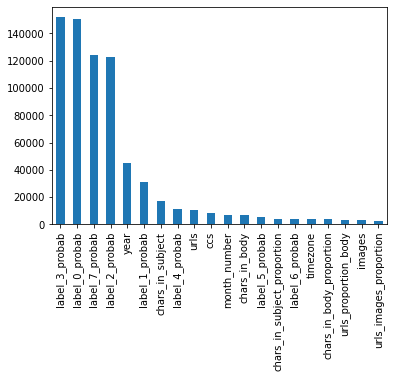

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     train_df[['label_3_probab', 'label_0_probab', 'label_7_probab', 'label_2_probab',
#        'year', 'label_1_probab', 'chars_in_subject', 'label_4_probab', 'urls',
#        'ccs', 'Ratio-SubtoBody', 'i/u_ratio', 'monthday', 'label_5_probab',
#        'chars_in_body', 'images', 'hour', 'full_wsite', 'add_info']], train_df['label'], test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(
    train_df[['label_3_probab', 'label_0_probab', 'label_7_probab', 'label_2_probab',
       'year', 'label_1_probab', 'chars_in_subject', 'label_4_probab', 'urls',
       'ccs', 'month_number', 'chars_in_body', 'label_5_probab',
       'label_6_probab', 'timezone', 'chars_in_subject_proportion',
       'urls_proportion_body', 'chars_in_body_proportion',
       'urls_images_proportion', 'images']], train_df['label'], test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(
#     train_df.drop(['label'],axis = 1), train_df['label'], test_size=0.2, random_state=42)

model = LGBMClassifier(max_depth = -1, num_leaves = 17, min_data_in_leaf = 600,
                       boosting_type = 'dart', min_gain_to_split = 0.4, lambda_l1 = 1, lambda_l2 = 1.05, n_estimators = 101, importance_type = 'gain',
                       objective = 'multiclass')

#model = GridSearchCV(model, gridParams, verbose=1, cv=4, n_jobs=-1)
model.fit(X_train, y_train)
#print(model.best_params_)
#print(model.best_score_)
pred = model.predict(X_test)
print(f'Acuracy of the GBM:{accuracy_score(y_test, pred)}')
classification_report(y_test, pred)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar')

print(feat_importances.nlargest(20).index)
#0.5992766275879272 next goal 0.6092766275879272  0.6025193315041157 0.6058867548016962

In [ ]:
model = LGBMClassifier(max_depth = -1, num_leaves = 17, min_data_in_leaf = 600,
                       boosting_type = 'dart', min_gain_to_split = 0.4, lambda_l1 = 1, lambda_l2 = 1.05, 
                       n_estimators = 101, importance_type = 'gain',
                       objective = 'multiclass')

#model = GridSearchCV(model, gridParams, verbose=1, cv=4, n_jobs=-1)
#model.fit(train_df.drop(['label', 'label_4_probab', 'label_5_probab', 'label_6_probab'],axis = 1), train_df['label'])
model.fit(train_df[['label_3_probab', 'label_0_probab', 'label_7_probab', 'label_2_probab',
       'year', 'label_1_probab', 'chars_in_subject', 'label_4_probab', 'urls',
       'ccs', 'month_number', 'chars_in_body', 'label_5_probab',
       'label_6_probab', 'timezone', 'chars_in_subject_proportion',
       'urls_proportion_body', 'chars_in_body_proportion',
       'urls_images_proportion', 'images']], train_df['label'])
#print(model.best_params_)
#print(model.best_score_)
pred = model.predict(test_df[['label_3_probab', 'label_0_probab', 'label_7_probab', 'label_2_probab',
       'year', 'label_1_probab', 'chars_in_subject', 'label_4_probab', 'urls',
       'ccs', 'month_number', 'chars_in_body', 'label_5_probab',
       'label_6_probab', 'timezone', 'chars_in_subject_proportion',
       'urls_proportion_body', 'chars_in_body_proportion',
       'urls_images_proportion', 'images']])

pred_df = pd.DataFrame(pred, columns=['label'])
pred_df.to_csv("light20features.csv", index=True, index_label='Id')